## Предобработка данных

### Загрузка и изучение данных

Загрузим и обработаем каждую из предоставленных таблиц.

In [10]:
contract = pd.read_csv('contract.csv')
personal = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')

contract.info()
contract

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65
...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,1990.5
7039,2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7362.9
7040,4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,346.45
7041,8361-LTMKD,2019-07-01,2019-11-01 00:00:00,Month-to-month,Yes,Mailed check,74.40,306.6


`customerID` - "первичный ключ", по этому столбцу в дальнейшем будем объединять таблицы. Далее столбец подлежт удалению.  
`BeginDate` -  дата, когда клиент таковым стал. Тип данных заменим на `datetime`  
`EndDate` - дата ухода клиента из компании. Если в этом столбце значение `No`, то **клиент до сих пор с нами**. Из этого столбца извлечем в дальнейшем целевой признак.  
`Type` - периодичность оплаты, избранная клиентом  
`PaperlessBilling` - безналичный расчет, если в столбце значение `Yes`  
`PaymentMethod` - тип платежа  
`MonthlyCharges` – ежемесячные траты на услуги
`TotalCharges` – всего потрачено денег на услуги  

Из наблюдений: тип `object` не совсем естественен для столбца `TotalCharges`. Подозреваем наличие некоторых строковых значений с этом столбце.

In [11]:
contract['TotalCharges'].value_counts()

          11
20.2      11
19.75      9
20.05      8
19.9       8
          ..
6849.4     1
692.35     1
130.15     1
3211.9     1
6844.5     1
Name: TotalCharges, Length: 6531, dtype: int64

Пустые значения, равные одному пробелу. Удаляем 11 строк из датасета. Тип данных менем на `float`.

In [12]:
contract = contract.drop(contract[contract.TotalCharges == ' '].index)
contract['TotalCharges'] = contract['TotalCharges'].astype(float)
contract.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
dtypes: float64(2), object(6)
memory usage: 494.4+ KB


________________

In [13]:
personal.info()
personal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No
...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes
7039,2234-XADUH,Female,0,Yes,Yes
7040,4801-JZAZL,Female,0,Yes,Yes
7041,8361-LTMKD,Male,1,Yes,No


`customerID` - "первичный ключ", по этому столбцу в дальнейшем будем объединять таблицы. Далее столбец подлежт удалению.    
`gender` -  пол клиента      
`SeniorCitizen` - пенсионный возраст клиента    
`Partner` - наличие супруга/супруги    
`Dependents` - наличие иждивенцев  
Пропусков и артефактов не обнаружено
________

In [14]:
internet.info()
internet

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...
5512,6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
5513,2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
5514,4801-JZAZL,DSL,Yes,No,No,No,No,No
5515,8361-LTMKD,Fiber optic,No,No,No,No,No,No



`customerID` - "первичный ключ", по этому столбцу в дальнейшем будем объединять таблицы. Далее столбец подлежт удалению.  
`InternetService` -  интернет-подключение. Может быть двух типов: через телефонную линию (DSL) или оптоволоконный кабель (Fiber optic).  
`OnlineSecurity` - возможность блокироваки небезопасных сайтов  
`OnlineBackup` - наличие облачного хранилища файлов для резервного копирования данных  
`DeviceProtection` - наличие антивируса  
`TechSupport` - наличие выделенной линии технической поддержки   
`StreamingTV` – наличие стримингового телевидения  
`StreamingMovies` – вналичие каталога фильмов  

In [15]:
phone.info()
phone

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes
...,...,...
6356,2569-WGERO,No
6357,6840-RESVB,Yes
6358,2234-XADUH,Yes
6359,8361-LTMKD,Yes


`customerID` - "первичный ключ", по этому столбцу в дальнейшем будем объединять таблицы. Далее столбец подлежт удалению.  
`MultipleLines` – наличие возможности ведения параллельных линий во время звонка

**Вывод:** данных немного, проблемных нюансов тоже. Данных немного - при дальнейшем объединении следует уделить внимание сохранению информации о всех уникальны пользователях.
__________
### Объединение таблиц

In [16]:
contract_personal = contract.merge(personal, on = 'customerID', how = 'left')
contract_personal_internet = contract_personal.merge(internet, on = 'customerID', how = 'left')                                                            
data = contract_personal_internet.merge(phone, on = 'customerID', how = 'left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   5512 non-null   object 
 13  OnlineSecurity    5512 non-null   object 
 14  OnlineBackup      5512 non-null   object 
 15  DeviceProtection  5512 non-null   object 
 16  TechSupport       5512 non-null   object 


Если среди полученных признаков имеются пропущенные значения - это означает, что услугой не пользовались. При ближайшем рассмотрении признаков делаем вывод - пропуски о всех столбцах можно заполнить значением "No"

In [17]:
data = data.fillna('No')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   BeginDate         7032 non-null   object 
 2   EndDate           7032 non-null   object 
 3   Type              7032 non-null   object 
 4   PaperlessBilling  7032 non-null   object 
 5   PaymentMethod     7032 non-null   object 
 6   MonthlyCharges    7032 non-null   float64
 7   TotalCharges      7032 non-null   float64
 8   gender            7032 non-null   object 
 9   SeniorCitizen     7032 non-null   int64  
 10  Partner           7032 non-null   object 
 11  Dependents        7032 non-null   object 
 12  InternetService   7032 non-null   object 
 13  OnlineSecurity    7032 non-null   object 
 14  OnlineBackup      7032 non-null   object 
 15  DeviceProtection  7032 non-null   object 
 16  TechSupport       7032 non-null   object 


_____________
После удачного заполнения пропусков перейдём к экстрагированию целевого признака из имеющихся данных и созданию новых признаков. 
1. В столбце целевого признака фиксируем наличие/отсутсвие у объекта даты окончания контракта с компанией, проставляем "1" и "0" для этих случаев.
2. Данные актуальны на 01.02.2022. Будем временно считать это значением EndDate. Если такоевое известно для объекта - ячейку оставляем без изменений. Если нет - запомняем это крайним актуальным сроком: 1 февраля 2020 года в нужном формате.
3. Переведем стобцы `BeginDate` и `EndDate` в специальный тип даты/времени. 
4. Найдем разность между `EndDate` и `BeginDate`. Извлечем из неё новый признак - число месяцев жизни клиента.

In [18]:
data.loc[data['EndDate'] == 'No', 'target'] = '0'
data.loc[data['EndDate'] != 'No', 'target'] = '1'
data.loc[data['EndDate'] != 'No', 'EndDate'] = data['EndDate']
data.loc[data['EndDate'] == 'No', 'EndDate'] = '2020-02-01 00:00:00'
data['BeginDate'] = pd.to_datetime(data['BeginDate'], format = '%Y.%m.%d')
data['EndDate'] = pd.to_datetime(data['EndDate'], format = '%Y.%m.%d')
data['month'] = (data['EndDate'] - data['BeginDate']).dt.days

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7031
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7032 non-null   object        
 1   BeginDate         7032 non-null   datetime64[ns]
 2   EndDate           7032 non-null   datetime64[ns]
 3   Type              7032 non-null   object        
 4   PaperlessBilling  7032 non-null   object        
 5   PaymentMethod     7032 non-null   object        
 6   MonthlyCharges    7032 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   7032 non-null   object        
 13  OnlineSecurity    7032 non-null   object        
 14  OnlineBackup      7032 n

________

### Подготовка признаков

Избавимся от лишних признаков: "ключа", дат, и того, что характеризует предпочтения покупателей и не влияет на то, услугами какого провайдера он пользуется.

#### Результаты feature importance
Полученную диаграмму используем для отбора признаков для построения обучающего датасета.

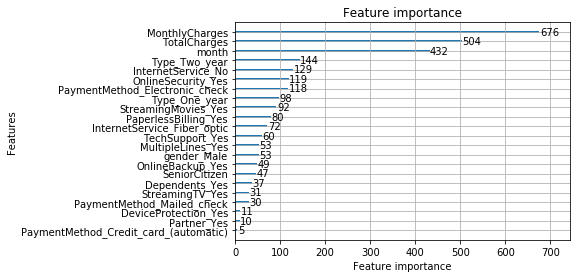

In [20]:
df = data.drop(['customerID', 'BeginDate', 'EndDate','TechSupport', 'DeviceProtection',
                'PaperlessBilling', 'PaymentMethod', 'OnlineSecurity', 'OnlineBackup'], axis = 1)
df

,Type,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,StreamingTV,StreamingMovies,MultipleLines,target,month
0,Month-to-month,29.85,29.85,Female,0,Yes,No,DSL,No,No,No,0,31
1,One year,56.95,1889.50,Male,0,No,No,DSL,No,No,No,0,1036
2,Month-to-month,53.85,108.15,Male,0,No,No,DSL,No,No,No,1,61
3,One year,42.30,1840.75,Male,0,No,No,DSL,No,No,No,0,1371
4,Month-to-month,70.70,151.65,Female,0,No,No,Fiber optic,No,No,No,1,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,One year,84.80,1990.50,Male,0,Yes,Yes,DSL,Yes,Yes,Yes,0,730
7028,One year,103.20,7362.90,Female,0,Yes,Yes,Fiber optic,Yes,Yes,Yes,0,2191
7029,Month-to-month,29.60,346.45,Female,0,Yes,Yes,DSL,No,No,No,0,337
7030,Month-to-month,74.40,306.60,Male,1,Yes,No,Fiber optic,No,No,Yes,1,123


Закодируем категориальные признаки техникой *one hot encoding*

In [21]:
df_ohe = pd.get_dummies(df.drop(['target','MonthlyCharges', 'TotalCharges', 'month'], axis = 1), drop_first = True)
df_ohe = df_ohe.merge(df['MonthlyCharges'], left_index=True, right_index=True)
df_ohe = df_ohe.merge(df['TotalCharges'], left_index=True, right_index=True)
df_ohe = df_ohe.merge(df['month'], left_index=True, right_index=True)
df = df_ohe.merge(df['target'], left_index=True, right_index=True)
df.corr()

,SeniorCitizen,Type_One year,Type_Two year,gender_Male,Partner_Yes,Dependents_Yes,InternetService_Fiber optic,InternetService_No,StreamingTV_Yes,StreamingMovies_Yes,MultipleLines_Yes,MonthlyCharges,TotalCharges,month
SeniorCitizen,1.000000,-0.046491,-0.116205,-0.001819,0.016957,-0.210550,0.254923,-0.182519,0.105445,0.119842,0.142996,0.219874,0.102411,0.015630
Type_One year,-0.046491,1.000000,-0.288843,0.007755,0.083067,0.069222,-0.076809,0.038061,0.061930,0.064780,-0.003594,0.004810,0.170569,0.202418
Type_Two year,-0.116205,-0.288843,1.000000,-0.003603,0.247334,0.201699,-0.209965,0.217542,0.072124,0.075603,0.106618,-0.073256,0.358036,0.563814
gender_Male,-0.001819,0.007755,-0.003603,1.000000,-0.001379,0.010349,-0.011189,0.004745,-0.007124,-0.010105,-0.008883,-0.013779,0.000048,0.005290
Partner_Yes,0.016957,0.083067,0.247334,-0.001379,1.000000,0.452269,0.001235,-0.000286,0.124483,0.118108,0.142561,0.097825,0.319072,0.381924
Dependents_Yes,-0.210550,0.069222,0.201699,0.010349,0.452269,1.000000,-0.164101,0.138383,-0.016499,-0.038375,-0.024307,-0.112343,0.064653,0.163442
InternetService_Fiber optic,0.254923,-0.076809,-0.209965,-0.011189,0.001235,-0.164101,1.000000,-0.465736,0.329744,0.322457,0.366420,0.787195,0.360769,0.017782
InternetService_No,-0.182519,0.038061,0.217542,0.004745,-0.000286,0.138383,-0.465736,1.000000,-0.414951,-0.418450,-0.210794,-0.763191,-0.374878,-0.037417
StreamingTV_Yes,0.105445,0.061930,0.072124,-0.007124,0.124483,-0.016499,0.329744,-0.414951,1.000000,0.533380,0.257804,0.629668,0.515709,0.280165
StreamingMovies_Yes,0.119842,0.064780,0.075603,-0.010105,0.118108,-0.038375,0.322457,-0.418450,0.533380,1.000000,0.259194,0.627235,0.519867,0.285298


[[<AxesSubplot:xlabel='SeniorCitizen', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='Type_One year', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='Type_Two year', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='gender_Male', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='Partner_Yes', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='Dependents_Yes', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='InternetService_Fiber optic', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='InternetService_No', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='StreamingTV_Yes', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='StreamingMovies_Yes', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='MultipleLines_Yes', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='MonthlyCharges', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='TotalCharges', ylabel='SeniorCitizen'>
  <AxesSubplot:xlabel='month', ylabel='SeniorCitizen'>]
 [<AxesSubplot:xlabel='SeniorCitizen', ylabel='Type_One year'>
  <AxesSubplot:xlabel='Type_One ye

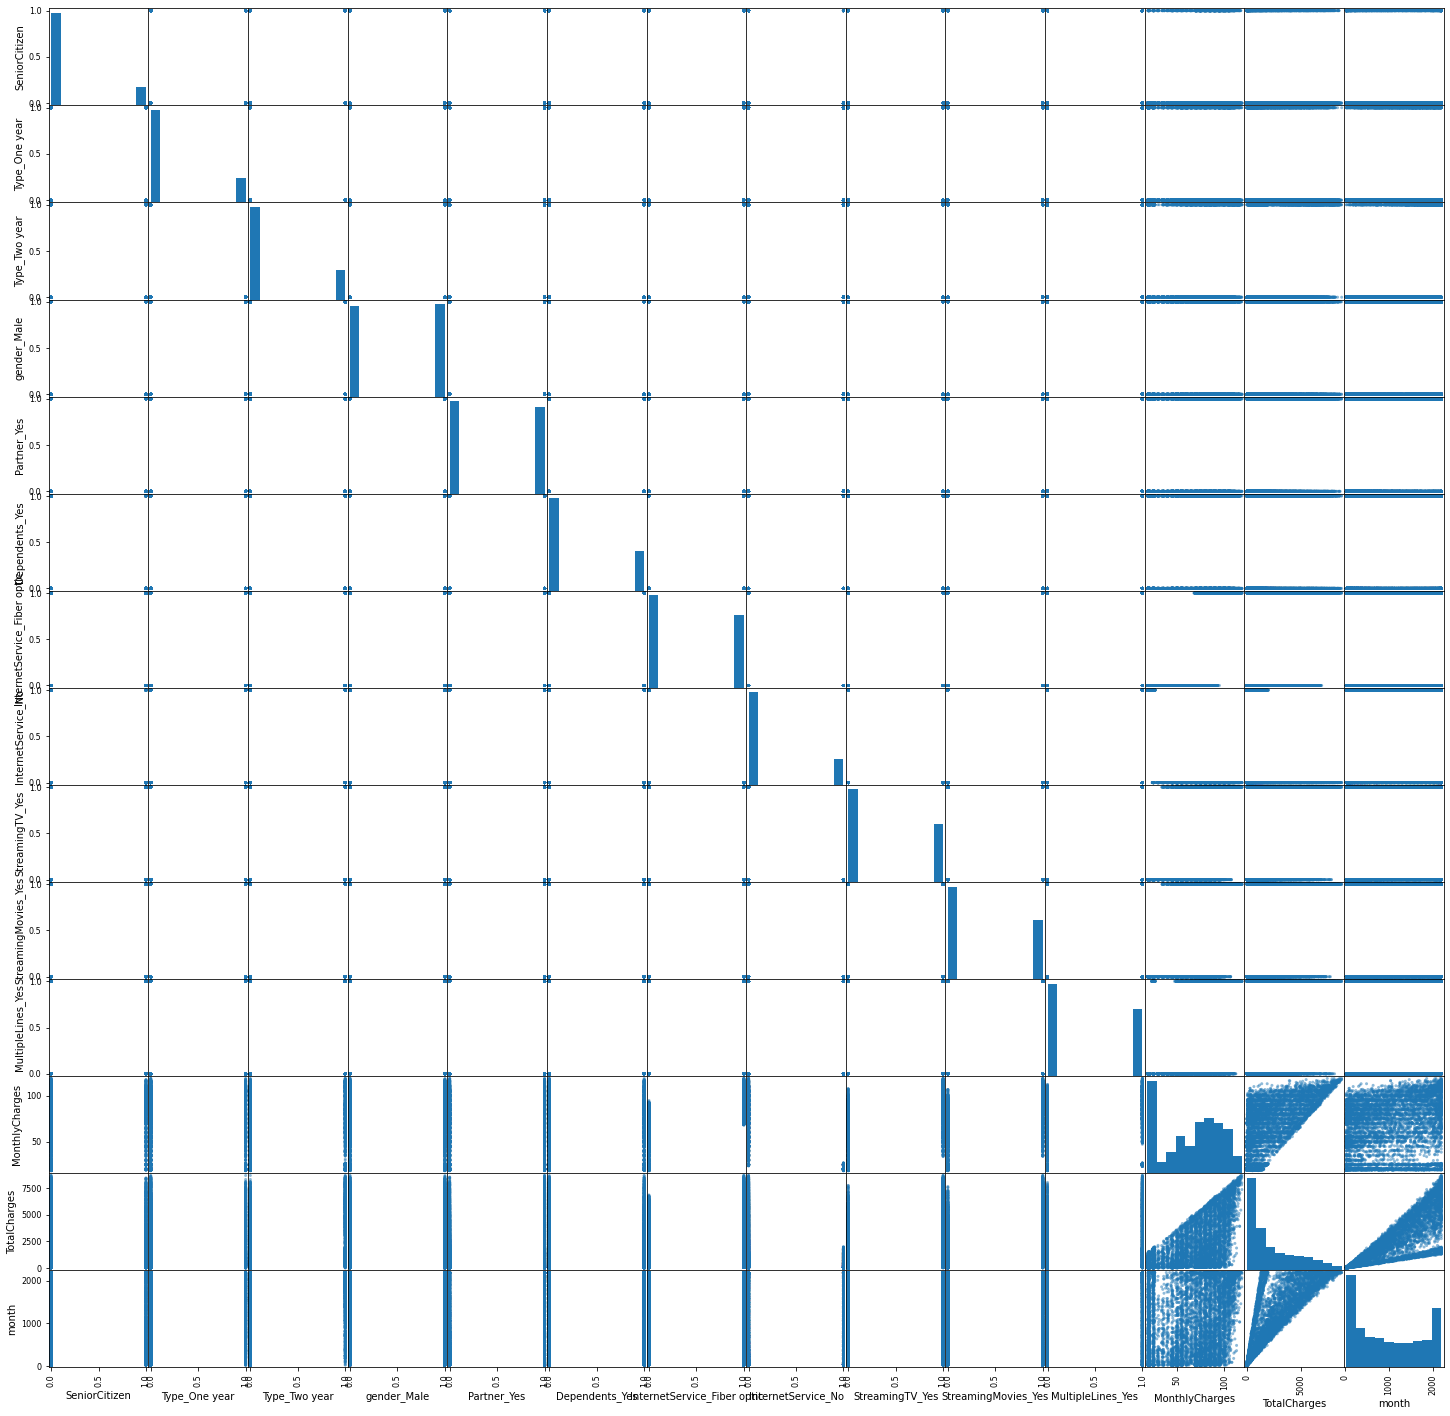

In [22]:
print(pd.plotting.scatter_matrix(df, figsize=(25,25)))
plt.show()fonth

Во избежание утечки данных масштабирование количественных признаков выполним после разделения признаков на обучающую и валидационную выборки.

Выраженно коррелирующих признаков не обнаружено
__________

## Подготовка обучающей и тестовой выборок

In [31]:
X = df.drop(['target', 'TotalCharges'], axis = 1)
y = df['target'].astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5625 entries, 5472 to 3582
Data columns (total 13 columns):
SeniorCitizen                  5625 non-null int64
Type_One year                  5625 non-null uint8
Type_Two year                  5625 non-null uint8
gender_Male                    5625 non-null uint8
Partner_Yes                    5625 non-null uint8
Dependents_Yes                 5625 non-null uint8
InternetService_Fiber optic    5625 non-null uint8
InternetService_No             5625 non-null uint8
StreamingTV_Yes                5625 non-null uint8
StreamingMovies_Yes            5625 non-null uint8
MultipleLines_Yes              5625 non-null uint8
MonthlyCharges                 5625 non-null float64
month                          5625 non-null int64
dtypes: float64(1), int64(2), uint8(10)
memory usage: 230.7 KB


**Вывод:** разбиение успешно
______
Масштабируем количественные признаки

In [32]:
scaler = StandardScaler()
needed_columns = ['MonthlyCharges', 'month']
scaler.fit(X_train[needed_columns]) 
X_train[needed_columns] = scaler.transform(X_train[needed_columns])
X_test[needed_columns] = scaler.transform(X_test[needed_columns])

_________
## Обучение прототипа модели

Метрика для несбалансированной бинарной классификации - ROC-AUC

После нескольких тестов лучше всего себя показала модель градиентного бустинга. Напишем небольшую функцию для удобной работы с метриками.

In [ ]:
def get_score(self, model):
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)

    acc = round(model.score(X_test, self.y_test), 3)
    prec = round(precision_score(y_test, pred_test), 3)
    recall = round(recall_score(y_test, pred_test), 3)
    auc = round(roc_auc_score(y_test, pred_proba_test), 3)
    return acc, prec, recall, auc

Обучение модели:

In [49]:
model = LGBMClassifier(learning_rate = 0.1)

model.fit(X_train, y_train)

def get_score(model):
    pred_proba_test = model.predict_proba(X_test)[:, 1]
    pred_test = model.predict(X_test)

    acc = round(model.score(X_test, y_test), 3)
    prec = round(precision_score(y_test, pred_test), 3)
    recall = round(recall_score(y_test, pred_test), 3)
    auc = round(roc_auc_score(y_test, pred_proba_test), 3)
    return acc, prec, recall, auc

get_score(model)

(0.846, 0.817, 0.608, 0.911)

**Итоги:**  
    Accuracy: точность предсказаний модели - 84,6%   
    Precision: 81,7% из всех действительно ушедших клиентов модель распознает как ушедших  
    Recall: 60,8% ушедших из всех действительно ушедших нашел алгоритм  
    Значение AUC: 0,911